** ML fundamentals **

**Section1: ** <br>
Introduction to K-Nearest Neighbors: 
Euclidean distance. <br>

$ d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2} $ <br>

where q represents feature values for one observation and p represents the feature values for other observations. <br>


import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore'

In [24]:

dc_listings = pd.read_csv('./dataset/dc_airbnb.csv')
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [25]:
#Calculate the distance between each value in the accommodates column from dc_listings and the value 3, which is the number of people our listing accommodates:
#accomodate for 3 people;
new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - new_listing))
print(dc_listings['distance'].value_counts())

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


It looks like there are quite a few, 461 to be precise, living spaces that can accommodate 3 people just like ours. <br>
This means the 5 "nearest neighbors" we select after sorting all will have a distance value of 0.<br>


In [26]:
import numpy as np
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings = dc_listings.sort_values('distance')
print(dc_listings.iloc[0:10]['price'])

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


Before select 5 most living spaces and compute the avg price. <br>
Clean the price column means convert $ to float <br>

In [27]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
mean_price = dc_listings.iloc[0:5]['price'].mean()
print(mean_price)

156.6


So, need to charge 156.6 dollar per day for a guest to stay ( 3 people )<br>
Next, Write a function named predict_price that can use the k-nearest neighbors machine learning technique to calculate the suggested price for any value for accommodates.<br>

In [28]:
def predict_price(new_listing):
    temp_df = dc_listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()
    return(predicted_price)

#Lets pedict for 1,2, & 3 accomodates;
acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)

print(acc_one)
print(acc_two)
print(acc_four)

78.8
126.0
197.6


**section 2 ** <br>
*Evaluating Model Performance* <br>
Simple way to test the quality of the model is to: <br>

split the dataset into 2 partitions: <br>

the training set: contains the majority of the rows (75%) <br>
the test set: contains the remaining minority of the rows (25%) <br>
use the rows in the training set to predict the price value for the rows in the test set. <br>

add new column named predicted_price to the test set
compare the predicted_price values with the actual price values in the test set to see how accurate the predicted values are. <br> This method is called train/test valdiation.


In [29]:
import pandas as pd
import numpy as np
dc_listings = pd.read_csv("./dataset/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]


def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)


test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

test_df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,predicted_price
2792,20%,75%,1,2,Entire home/apt,0.0,1.0,1.0,120.0,NaN,NaN,1,1125,8,38.922187,-77.032475,Washington,20009,DC,104.0
2793,100%,25%,2,3,Entire home/apt,2.0,2.0,1.0,140.0,$75.00,$150.00,2,1125,7,38.931681,-77.044739,Washington,20010,DC,177.4
2794,NaN,NaN,1,4,Entire home/apt,2.0,1.0,1.0,299.0,NaN,NaN,2,1125,5,38.933765,-77.031488,Washington,20010,DC,145.8
2795,100%,100%,1,3,Entire home/apt,1.0,1.0,1.0,85.0,$30.00,$250.00,1,92,2,38.925692,-77.032616,Washington,20009,DC,177.4
2796,100%,100%,1,6,Entire home/apt,2.0,2.0,3.0,175.0,$65.00,$850.00,1,1125,62,38.927572,-77.033604,Washington,20009,DC,187.2


Now, need to find the **error metric** means how off our predicted price values are from the actual price values in the test dataset.<br> **mean absolute error** ( find the diff between each predicted and actual value and then avg these diff ).<br>

$ MAE = \dfrac{ |(actual_1-predicted_1)| + |(actual_2-predicted_2)| + \cdots + |(actual_n-predicted_n)| }{ n } $ <br>

In [30]:
test_df['squared_error'] = np.absolute(test_df['predicted_price'] - test_df['price'])
mae = test_df['squared_error'].mean()
print(mae)

56.29001074113876


OR ** mean squared error ** or MSE makes the gap between the predicted and actual values more clear.<br>
$ MSE = \dfrac{ (actual_1-predicted_1)^2 + (actual_2-predicted_2)^2 + \cdots + (actual_n-predicted_n)^2 }{ n } $ <br>

where n represents the number of rows in the test set.<br>



In [32]:
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
print(mse)

18646.525370569325


The model we trained achieved a mean squared error of around 18646.5. Is this a high or a low mean squared error value? What does this tell us about the quality of the predictions and the model? By itself, the mean squared error value for a single model isn't all that useful. <br>
Let's train another model, this time using the bathrooms column, and compare MSE values.<br>

In [33]:
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**(2)
mse = test_df['squared_error'].mean()
print(mse)

18405.444081632548


While comparing MSE values helps us identify which model performs better on a relative basis. <br>
**Root mean squared error**  $RMSE = \sqrt{MSE} $ <br>

In [35]:
rmse = mse ** (1/2)
print(rmse)

135.6666653295221


The model achieved an RMSE value of approximately 135.6, which implies that we should expect for the model to be off by 135.6 dollars on average for the predicted price values. <br> And, to reduce this error as much as possible to improve the model's usefulness.<br>  To better understand a specific model, compare multiple error metrics for the same model. This requires a better understanding of the mathematical properties of the error metrics. <br> **MAE** and **RMSE**.<br>

In [36]:
#Examples: 
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])
mae_one = errors_one.sum()/len(errors_one)
rmse_one = np.sqrt((errors_one**2).sum()/len(errors_one))
print(mae_one)
print(rmse_one)

mae_two = errors_two.sum()/len(errors_two)
rmse_two = np.sqrt((errors_two**2).sum()/len(errors_two))
print(mae_two)
print(rmse_two)

7.5
7.905694150420948
62.5
235.82302686548658


While comparing MAE(7.5) to RMSE(7.9) ratio about 1:1 for 1st list of errors.<br>
For 2nd list, MAE( 62.5 ) to RMSE(235.82) ratio about 1:4. <br>
expected that the MAE value be much less than the RMSE value. <br> The only diff b/w 2 sets is 1000 instead of 10 and can't inspect each value in the large data set. <br>
Ref: https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d <br>
Until now, learned Cross validation and different metrics; <br>
    

**Section 3** : *Multivariate K-Nearest Neighbors* <br>
In Univariant KNN, used just one feature or attribute to predict the rent price. <br>
There are 2 ways to improve accuracy( decrease the RMSE during validation ): <br>
    * increase the number of attributes the model uses to calculate similarity when ranking the closest neighbors. 
    * increase k, the number of nearby neighbors the model uses when computing the prediction. 


In [50]:
dc_listings = pd.read_csv('./dataset/dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
print(dc_listings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 3248 to 715
Data columns (total 19 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
dtypes: float64(6), int64(5), objec

Clean the data set, <br>
The following columns contain non-numerical values:

room_type: e.g. Private room <br>
city: e.g. Washington <br>
state: e.g. DC <br>

while these columns contain numerical but non-ordinal values: <br>

latitude: e.g. 38.913458 <br>
longitude: e.g. -77.031 <br>
zipcode: e.g. 20009 <br>

In [69]:
#remove 9 col's due to don't directly describe the living  space or the listing itself;

dc_listings = pd.read_csv('./dataset/dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')

drop_columns = ['room_type', 'city', 'state', 'latitude', 'longitude', 'zipcode', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis=1)
print(dc_listings.isnull().sum())

dc_listings.head()

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


,accommodates,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
2563,2,1.0,2.0,1.0,125.0,$25.00,$200.00,3,1125,14
615,4,1.0,1.0,1.0,95.0,$75.00,$400.00,3,365,13
1930,2,1.0,1.0,1.0,59.0,$14.00,NaN,1,1125,19
3328,3,1.0,1.0,1.0,57.0,$20.00,NaN,1,5,1
1441,4,1.0,1.0,4.0,49.0,$5.00,NaN,1,1125,11


Col's bedrooms,
bathrooms,
beds, are few missing values and 2 col's cleaning_fee and security_deposit are a large number of missing values and these col's. <br>


In [70]:
dc_listings = dc_listings.drop(['cleaning_fee', 'security_deposit'], axis=1)
dc_listings = dc_listings.dropna(axis=0)
print(dc_listings.isnull().sum())

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [71]:

dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
2563,2,1.0,2.0,1.0,125.0,3,1125,14
615,4,1.0,1.0,1.0,95.0,3,365,13
1930,2,1.0,1.0,1.0,59.0,1,1125,19
3328,3,1.0,1.0,1.0,57.0,1,5,1
1441,4,1.0,1.0,4.0,49.0,1,1125,11


Normalizing the values in each column to the standard normal distribution (mean of 0, standard deviation of 1) preserves the distribution of the values in each column while aligning the scales.<br> To normalize the values in a column to the standard normal distribution: <br>

from each value, subtract the mean of the column. <br>
divide each value by the standard deviation of the column <br>

$ x=\frac{x-\mu}{\sigma} $ <br>

x - specific column, $\mu$ - mean of all valuesin in the col's, $\sigma$ - std dev all the values in the col's. <br>

Ref: https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution

In [72]:
normalized_listings = (dc_listings - dc_listings.mean())/(dc_listings.std())
normalized_listings['price'] = dc_listings['price']
print(normalized_listings.head(3))

      accommodates  bedrooms  bathrooms      beds  price  minimum_nights  \
2563     -0.596544 -0.249467   1.264998 -0.546858  125.0        0.211298   
615       0.401366 -0.249467  -0.439151 -0.546858   95.0        0.211298   
1930     -0.596544 -0.249467  -0.439151 -0.546858   59.0       -0.341375   

      maximum_nights  number_of_reviews  
2563       -0.016573          -0.037856  
615        -0.016594          -0.072060  
1930       -0.016573           0.133163  


In Univariant models, trained 2 attributes accommodates  and bathrooms. <br>
From Euclidean distance equation using 2 attributes: <br>
$ d = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_n-p_n)^2} $ <br>

$ d = \sqrt{(accommodates_1-accommodates_2)^2 + (bathrooms_1-bathrooms_2)^2 } $ <br>

To find the distance between 2 living spaces, we need to calculate the squared difference between both accommodates values, the squared difference between both bathrooms values, add them together, and then take the square root of the resulting sum. <br>

Ref: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.euclidean.html <br>

In [74]:
#find the the Euclidean distance using only the accommodates and bathrooms features between the 
# first row and fifth row in normalized_listings using the distance.euclidean() function.
from scipy.spatial import distance
first_listing = normalized_listings.iloc[0][['accommodates', 'bathrooms']]
fifth_listing = normalized_listings.iloc[4][['accommodates', 'bathrooms']]
first_fifth_distance = distance.euclidean(first_listing, fifth_listing)
print(first_fifth_distance)

1.9748284912308922


How to use scikit-learn> <br>
instantiate the specific machine learning model you want to use. <br>
fit the model to the training data. <br>
use the model to make predictions. <br>
evaluate the accuracy of the prediction. <br>

Ref: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor <br>


Create an instance of the KNeighborsRegressor class with the following parameters: <br>

n_neighbors: 5 <br>
algorithm: brute <br>


In [76]:

from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates', 'bathrooms']

# Instantiate ML model.
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

# Fit model to data.
knn.fit(train_df[train_columns], train_df['price'])

# Use model to make predictions.
predictions = knn.predict(test_df[train_columns])

Earliear predicted *price* using MSE and RMSE with numpy and pandas;<br>
find the MSE and RMSE. <br>

In [80]:
from sklearn.metrics import mean_squared_error

two_features_mse = mean_squared_error(test_df['price'], predictions)
two_features_rmse = two_features_mse ** (1/2)

print(two_features_mse)
print(two_features_rmse)

13515.561501706483
116.2564471403908


In [82]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

knn.fit(train_df[features], train_df['price'])
four_predictions = knn.predict(test_df[features])
four_mse = mean_squared_error(test_df['price'], four_predictions)
four_rmse = four_mse ** (1/2)

print(four_mse)
print(four_rmse)

13107.22957906712
114.48680962917571


Observe, lower MSE and RMSE values when increased the features. <br>

Summary: <br>
increase the number of attributes the model uses to calculate similarity when ranking the closest neighbors. <br>
select the relevant attributes the model uses to calculate similarity when ranking the closest neighbors. <br>

The process of selecting features to use in a model is known as *feature selection.*<br>

**Section 4: Hyperparameter Optimization ** <br>
In previous section, increasing the number of attributes the model uses and adding more attributes generally lowered the error of the model.<br> Now, Checking the impact of increasing *k* value ( num of nearby neighbors ) uses to make predictions. <br>

varying the k value affects the behavior of the model independently of the actual data that's used when making predictions.<br> Values that affect the behavior and performance of a model that are unrelated to the data that's used are referred to as hyperparameters.<br>

The process of finding the optimal hyperparameter value is known as *hyperparameter optimization*.<br> A simple but common hyperparameter optimization technique is known as *grid search*. <br> 
which involves: <br>
selecting a subset of the possible hyperparameter values, <br>
training a model using each of these hyperparameter values, <br>
evaluating each model's performance, <br>
selecting the hyperparameter value that resulted in the lowest error value. <br>

Grid search essentially boils down to evaluating the model performance at different k values and <br> selecting the k value that resulted in the lowest error. <br>While grid search can take a long time when working with large datasets.<br>


Ref: https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search


In [87]:
import pandas as pd
train_df = pd.read_csv('./dataset/dc_airbnb_train.csv')
test_df = pd.read_csv('./dataset/dc_airbnb_test.csv')

In [88]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [1, 2, 3, 4, 5]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

print(mse_values)

[26364.92832764505, 15100.52246871445, 14578.804070281883, 15946.721060864618, 14119.735836177475]


In [89]:
#Lets increase k value to 20;
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [x for x in range(1, 21)]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
print(mse_values)

[26364.92832764505, 15100.52246871445, 14578.804070281883, 15946.721060864618, 14119.735836177475, 13495.78156996587, 14209.360474565252, 14615.818988196814, 14591.371971516453, 14608.888509670078, 14747.643537453343, 14802.514876437872, 14726.607851848858, 14788.004486777645, 14775.071925167487, 14846.632372546928, 14801.420334526101, 14761.434233626876, 14750.644695086017, 14653.391259954493]


Observation: increased *k* value from 1 to 6, MSE value decreased and from *k* value from 7 to 20, the MSE didn't change. This means the optimal value of **k** is 6.<br>

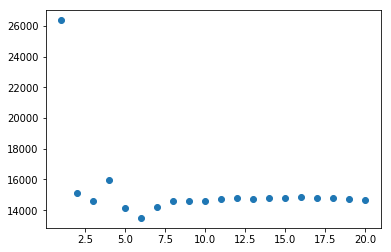

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [x for x in range(1, 21)]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
plt.scatter(hyper_params, mse_values)

Observation: from scatter plot, Lowest MSE value is 6. 

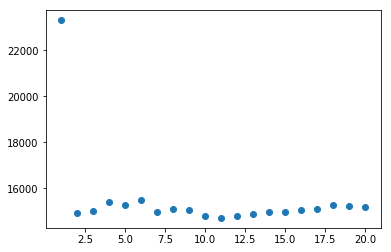

In [91]:
hyper_params = [x for x in range(1,21)]
mse_values = list()
features = train_df.columns.tolist()
features.remove('price')

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)

plt.scatter(hyper_params, mse_values)
plt.show()

Observation: removed *price* feature ( its important to choose proper attributes in the data set). <br>

select relevant features to use for predicting the target column. <br>
use grid search to find the optimal hyperparameter value for the selected features. <br>
evaluate the model's accuracy and repeat the process. <br>

Let experiment, using only  two feature the *accommodates* and *bathrooms* columns. <br>
using 3 feature *accommodates*, *bathrooms*, and *bedrooms* columns.<br> 

In [94]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'], predictions)
    two_mse_values.append(mse)

two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k,mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1
    
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'], predictions)
    three_mse_values.append(mse)
    
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1

two_hyp_mse[two_lowest_k] = two_lowest_mse
three_hyp_mse[three_lowest_k] = three_lowest_mse


print(two_hyp_mse)
print(three_hyp_mse)


{5: 14790.314266211606}
{7: 13518.769009310208}


1st model: MSE value 14790. <br>
2nd model: MSE value 13518 decreased. <br>
This tech are hyperparameter optimization and the workflow of finding the optimal model to make predictions

**Section 5: Cross Validation ** <br>

Before used train/test validation, a simple tech for testing a ML model's accuracy on data.<br>

1. Holdout Validation: which involves,<br>
splitting the full dataset into 2 partitions:
a training set. <br>
a test set. <br>
training the model on the training set.<br>
using the trained model to predict labels on the test set.<br>
computing an error metric to understand the model's effectiveness. <br>
switch the training and test sets and repeat. <br>
average the errors. <br>

In holdout validation, use a 50/50 split instead of the 75/25 split from train/test validation. <br>

In [96]:
dc_listings = pd.read_csv("./dataset/dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
shuffled_index = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(shuffled_index)

split_one = dc_listings.iloc[0:1862]
split_two = dc_listings.iloc[1862:]

Let's:<br>
train a k-nearest neighbors model on the first half.<br>
test this model on the second half.<br>
train a k-nearest neighbors model on the second half.<br>
test this model on the first half. <br>

In [97]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one
# First half
model = KNeighborsRegressor()
model.fit(train_one[["accommodates"]], train_one["price"])
test_one["predicted_price"] = model.predict(test_one[["accommodates"]])
iteration_one_rmse = mean_squared_error(test_one["price"], test_one["predicted_price"])**(1/2)

# Second half
model.fit(train_two[["accommodates"]], train_two["price"])
test_two["predicted_price"] = model.predict(test_two[["accommodates"]])
iteration_two_rmse = mean_squared_error(test_two["price"], test_two["predicted_price"])**(1/2)

avg_rmse = np.mean([iteration_two_rmse, iteration_one_rmse])

print(iteration_one_rmse, iteration_two_rmse, avg_rmse)

149.96800145891055 107.97696724995747 128.97248435443402


Avg RMSE is 128; <br>
This is examples of a larger class of valdiation tech is called **k-fold Cross validation**. <br>
Holdout validation is better than train/test validation. <br>

Steps for k-fold Cross validation: <br>
    splitting the full dataset into k equal length partitions.<br>
        selecting k-1 partitions as the training set and <br>
        selecting the remaining partition as the test set <br>
    training the model on the training set.<br>
    using the trained model to predict labels on the test fold.<br>
    computing the test fold's error metric.<br>
    repeating all of the above steps k-1 times, until each partition has been used as the test set for an iteration.<br>
    calculating the mean of the k error values. <br>


In [98]:
dc_listings.loc[dc_listings.index[0:745], "fold"] = 1
dc_listings.loc[dc_listings.index[745:1490], "fold"] = 2
dc_listings.loc[dc_listings.index[1490:2234], "fold"] = 3
dc_listings.loc[dc_listings.index[2234:2978], "fold"] = 4
dc_listings.loc[dc_listings.index[2978:3723], "fold"] = 5

print(dc_listings['fold'].value_counts())
print("\n Num of missing values: ", dc_listings['fold'].isnull().sum())

5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64

 Num of missing values:  0


In [101]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Training
model = KNeighborsRegressor()
train_iteration_one = dc_listings[dc_listings["fold"] != 1]
test_iteration_one = dc_listings[dc_listings["fold"] == 1]
model.fit(train_iteration_one[["accommodates"]], train_iteration_one["price"])

# Predicting
labels = model.predict(test_iteration_one[["accommodates"]])
test_iteration_one["predicted_price"] = labels

iteration_one_mse = mean_squared_error(test_iteration_one["price"], test_iteration_one["predicted_price"])
iteration_one_rmse = iteration_one_mse ** (1/2)

print(iteration_one_mse)
print(iteration_one_rmse)

9248.752644295302
96.17043539620325


In [102]:
# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]
def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        # Train
        model = KNeighborsRegressor()
        train = df[df["fold"] != fold]
        test = df[df["fold"] == fold]
        model.fit(train[["accommodates"]], train["price"])
        # Predict
        labels = model.predict(test[["accommodates"]])
        test["predicted_price"] = labels
        mse = mean_squared_error(test["price"], test["predicted_price"])
        rmse = mse**(1/2)
        fold_rmses.append(rmse)
    return(fold_rmses)

rmses = train_and_validate(dc_listings, fold_ids)
print(rmses)
avg_rmse = np.mean(rmses)
print(avg_rmse)

[96.17043539620325, 119.1833536415002, 121.79973978996519, 141.56354950476162, 159.2682137762055]
127.59705842172716


In [103]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(5, shuffle=True, random_state=1)
model = KNeighborsRegressor()
mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)

print(rmses)
print(avg_rmse)

[109.33567646 118.93230244 121.87268855 123.25076152 180.56000239]
130.79028627242698


Bias describes error that results in bad assumptions about the learning algorithm. For example, assuming that only one feature, like a car's weight, relates to a car's fuel efficiency will lead you to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's fuel efficiency is affected by many other factors besides just its weight. <br>

Variance describes error that occurs because of the variability of a model's predicted values. If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have low bias but high variance. In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff. <br>

The relationship between Bias and Variance:  <br>
  Increasing the bias will decrease the variance. <br>
  Increasing the variance will decrease the bias. <br>

*Predict a car's market price using its attributes.* <br>


In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('./dataset/imports-85.data', names=cols )
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:

continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [6]:
#replace ? to nan;
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head(2)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500


In [7]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
#remove price rows, if missing;
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
#replace missing value with col's mean
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [10]:
#check no missing values any col's
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
#Normalize all col's to range 0 to 1 except price col;
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

In [12]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


*Univariate Model*

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [16]:
#check for k 1 3 5 7

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

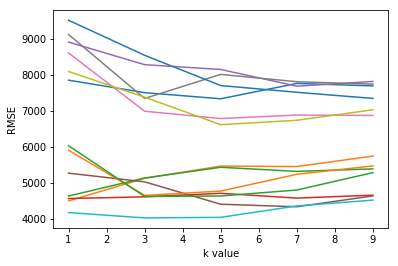

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

*Multivariate Model*

In [19]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [20]:
#check the rmse w r t increasing features
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'six best features': {5: 3628.261188214127},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.3132622073304}}

In [21]:
#Check rmse w r t increasing feature and increasing k values:

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.520542998191,
  7: 3817.290452118825,
  8: 4004.414529685573,
  9: 3992.3186041830318,
  10: 4138.728787853335,
  11: 4342.052852829098,
  12: 4416.145381031136,
  13: 4493.8798141857205,
  14: 4463.501601554571,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.900893982822,
  20: 4712.022985543165,
  21: 4755.856625823773,
  22: 4788.162720030673,
  23: 4806.923381965054,
  24: 4879.983352195467},
 'four best features': {1: 2516.589279950226,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.269482641261,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.998621362245,
  10: 4042.247226187899,
  11: 4230.335248684068,
  12: 4354.008675154061,
  13: 4461.626664877788,
  14: 4468.029845088927,
  15: 444

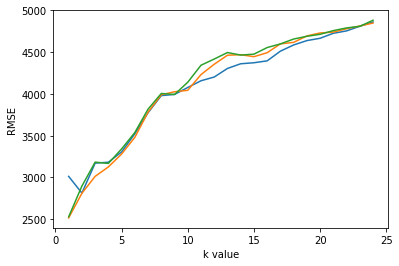

In [22]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

Choosing *k* value is an art. But, not science !